## Tabular XGBoost Model Evaluation

## Imports

In [8]:
# Standard Library
import joblib

# Third-Party Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import plot_importance

# Local Modules
from src.__00__paths import curated_tabular_dir, docs_dir, figures_dir, model_dir, processed_tabular_dir

## Load Data

In [9]:
test_df = pd.read_csv(curated_tabular_dir / "test.csv")

x_test = test_df.drop(columns=["label"])
y_test = test_df['label']

## Load Model

In [10]:
model = joblib.load(model_dir / "xgboost_gtzan_model.pkl")

## Evaluate Model

In [11]:
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print to console
print(f"Test Accuracy: {acc * 100:.2f}%\n")

# Save to txt file
with open(docs_dir / "xgboost_classification_report.txt", "w") as f:
    f.write(f"Test Accuracy: {acc * 100:.2f}%\n\n")
    f.write("Classification Report:\n")
    f.write(report)
print(f"✔️ Classification Report saved to {'/'.join((docs_dir / 'xgboost_classification_report.txt').parts[-3:])}")

Test Accuracy: 92.64%

✔️ Classification Report saved to outputs/docs/xgboost_classification_report.txt


## Confusion Matrix

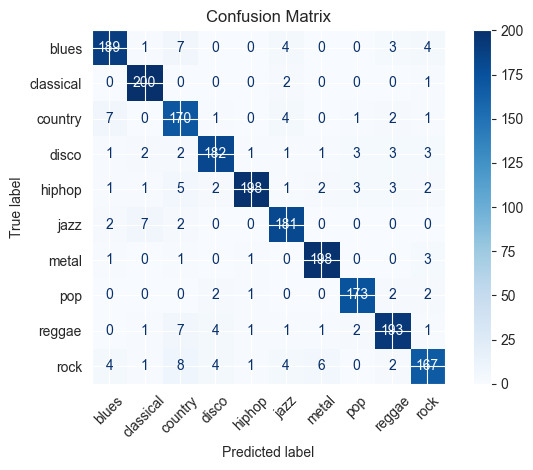

✔️ Confusion Matrix saved to outputs/figures/xgboost_confusion_matrix.png


In [12]:
# Load class names
label_mapping_df = pd.read_csv(processed_tabular_dir / "gtzan_label_mapping_3_sec.csv", index_col=0)
class_names = label_mapping_df['Label'].values

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(figures_dir / "xgboost_confusion_matrix.png")
plt.show()

print(f"✔️ Confusion Matrix saved to {'/'.join((figures_dir / 'xgboost_confusion_matrix.png').parts[-3:])}")

## Feature Importance

<Figure size 1400x600 with 0 Axes>

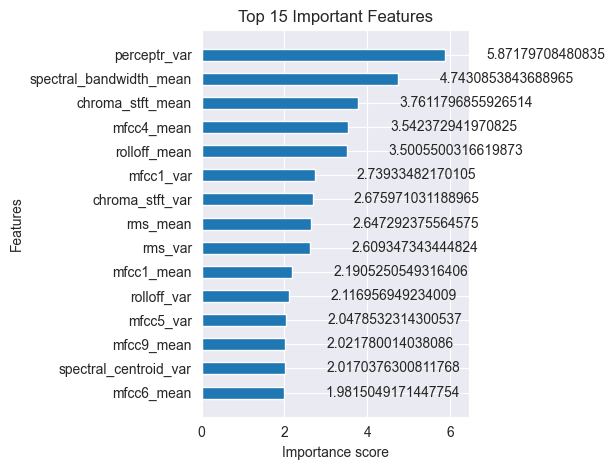

✔️ Feature Importance saved to outputs/figures/xgboost_feature_importance.png


In [13]:
plt.figure(figsize=(14, 6))
plot_importance(model, max_num_features=15, importance_type='gain', height=0.5)
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.savefig(figures_dir / "xgboost_feature_importance.png")
plt.show()

print(f"✔️ Feature Importance saved to {'/'.join((figures_dir / 'xgboost_feature_importance.png').parts[-3:])}")